In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [25]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

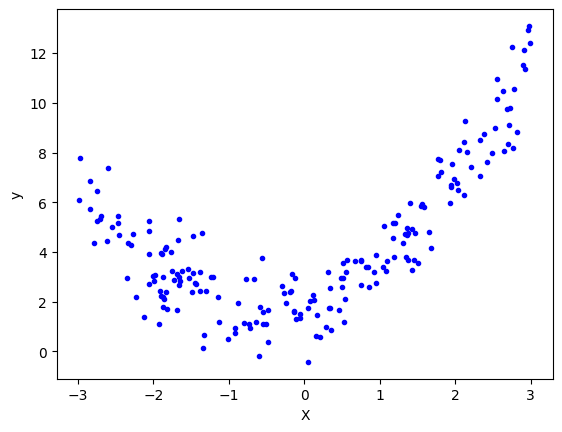

In [36]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [37]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
lr=LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
y_predict=lr.predict(X_test)

In [43]:
r2_score(y_test,y_predict)

0.15837797401475973

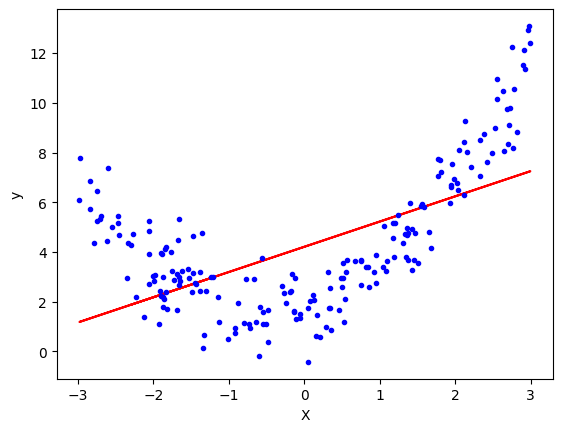

In [46]:
plt.plot(X_train,lr.predict(X_train),c='r')

plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [47]:
# apply polynomial linear regression 
# degrre=2

In [48]:
poly=PolynomialFeatures(degree=2,include_bias=True)

In [49]:
X_train_transform=poly.fit_transform(X_train)

In [50]:
x_test_transform=poly.transform(X_test)

In [51]:
print(X_train[0])
print(X_train_transform[0])

[-1.20435573]
[ 1.         -1.20435573  1.45047272]


In [52]:
lr = LinearRegression()
lr.fit(X_train_transform,y_train)

LinearRegression()

In [53]:
y_predict=lr.predict(x_test_transform)

In [54]:
r2_score(y_test,y_predict)

0.8701009386291569

In [58]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.85380531 0.80201811]]
[1.88870018]


In [60]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

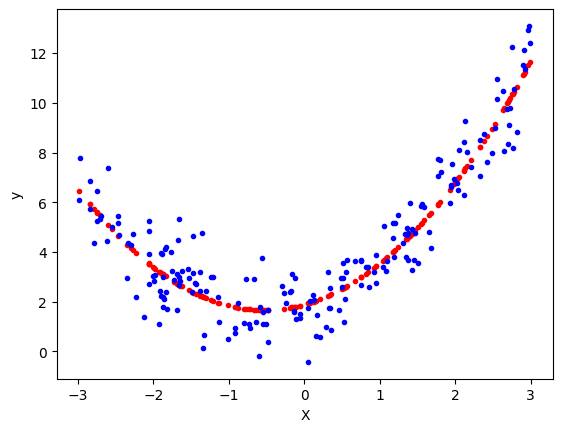

In [67]:
plt.plot(X_train,lr.predict(X_train_transform),'r.')

plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [ ]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

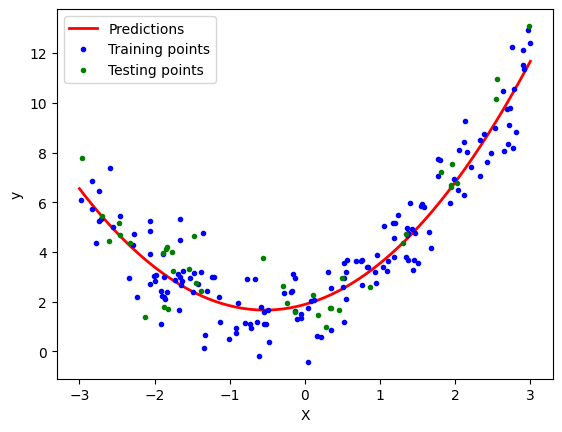

In [66]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [68]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

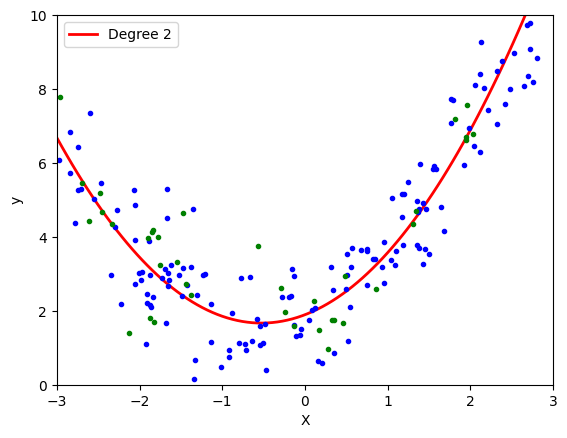

In [69]:
polynomial_regression(2)

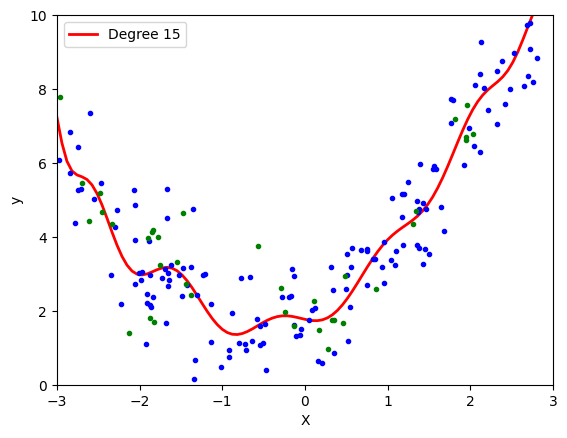

In [70]:
polynomial_regression(15)

In [71]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


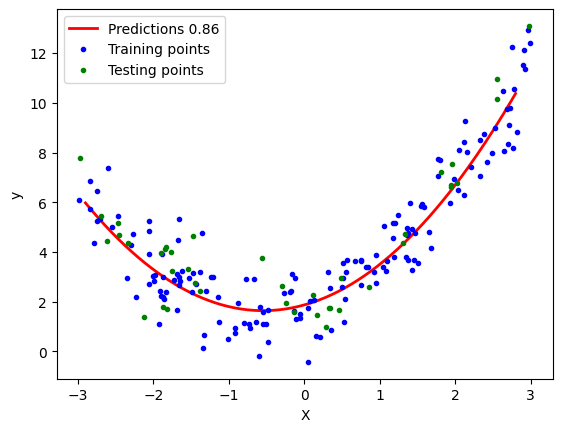

In [72]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [81]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [83]:
!pip install --upgrade nbformat


   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/78.5 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/78.5 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/78.5 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/78.5 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/78.5 kB ? eta -:--:--
   ------------------------------------ --- 71.7/78.5 kB 245.8 kB/s eta 0:00:01
   ---------------------------------------- 78.5/78.5 kB 198.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/88.5 kB ? eta -:--:--
   ------------------ --------------------- 41.0/88.5 kB ? eta -:--:--
   ------------------ --------------------- 41.0/88.5 kB ? eta -:--:--
   ------------------ --------------------- 41.0/88.5 kB ? eta -:--:--
   ------------------ --------------------- 41.0/88.5 kB ? eta -:--:--
   ------------------ --------------------- 41.0/88.5 kB ? et


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\vaibh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [91]:

!pip install nbformat



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\vaibh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [92]:
import nbformat
print(nbformat.__version__)


5.10.4


In [94]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [95]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [96]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [78]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [97]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [99]:
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

AttributeError: 'PolynomialFeatures' object has no attribute 'n_input_features_'

In [100]:
X_multi_trans.shape

(100, 496)

In [101]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)
LinearRegression()
X_test_multi = poly.transform(final)
z_final = lr.predict(X_multi_trans).reshape(10,10)


In [102]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()